In [46]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import random

from utils import decorate, savefig

<b>Exercise 2.1</b> Launch chap02.ipynb and run the code. There are a few short exercises embedded in the notebook that you might want to try.

In [4]:
# Copied code from Think Complexity 2 notebook begin------------------------------------------

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# make a directory for figures
!mkdir -p figs

# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

Saving figure to file figs/chap02-1


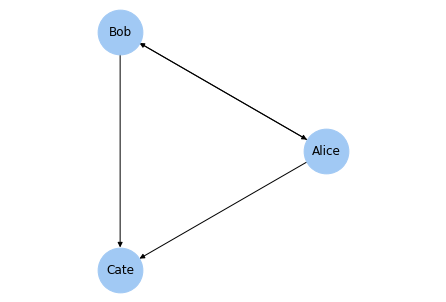

In [5]:
# Code for directed graph
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')
list(G.nodes())

G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Cate')
list(G.edges())

nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
savefig('figs/chap02-1')
# End copied code-------------------------------------------------------------------

<b>Exercise 2.1.a:</b> Add another node and a few more edges and draw the graph again.

Saving figure to file figs/chap02-1_soln-a


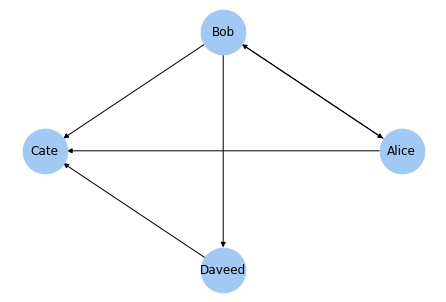

In [6]:
# My solution
G.add_node('Daveed')
G.add_edge('Daveed', 'Cate')
G.add_edge('Bob', 'Daveed')
nx.draw_circular(G, node_color = 'C0', node_size = 2000, with_labels = True)
savefig('figs/chap02-1_soln')

Saving figure to file figs/chap02-2


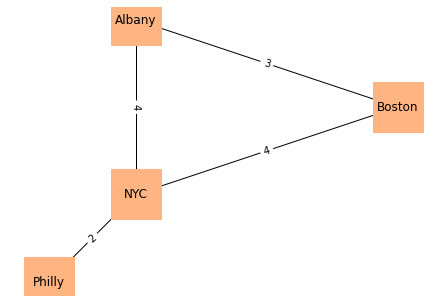

In [8]:
# Copied code from Think Complexity 2 notebook begin------------------------------------------

# Code for undirected graph

positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

G.add_edges_from(drive_times)
G.edges()

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
savefig('figs/chap02-2')
# End copied code-------------------------------------------------------------------

**Exercise 2.1.b:**  Add another city and at least one edge.

Saving figure to file figs/chap02-2_soln


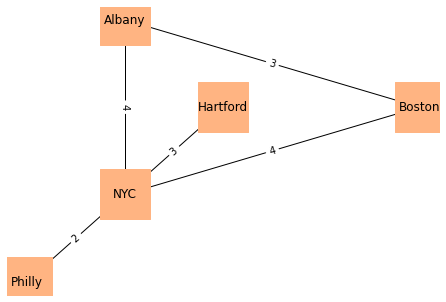

In [11]:
# My solution
positions["Hartford"] = (-73,42)
drive_times[('Hartford', 'NYC')] = 3
G.add_nodes_from(positions)
G.add_edges_from(drive_times)

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)
nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

savefig('figs/chap02-2_soln')

Saving figure to file figs/chap02-3


[1, 2, 3, 4, 5, 6, 7, 8, 9]

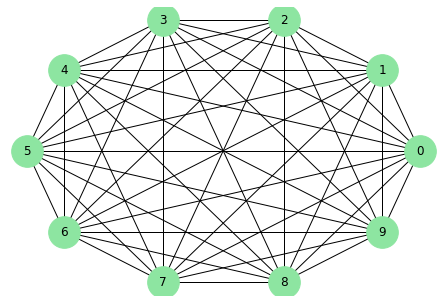

In [12]:
# Copied code from Think Complexity 2 notebook begin------------------------------------------

# Code for complete graph

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

complete = make_complete_graph(10)
complete.number_of_nodes()

nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

list(complete.neighbors(0))

# End copied code-------------------------------------------------------------------

**Exercise 2.1.c:** Make and draw complete directed graph with 5 nodes.

Saving figure to file figs/chap02-3-soln


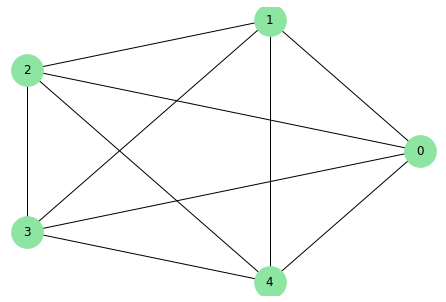

In [15]:
# My solution

pentagram = make_complete_graph(5)

nx.draw_circular(pentagram, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3-soln')

Saving figure to file figs/chap02-4


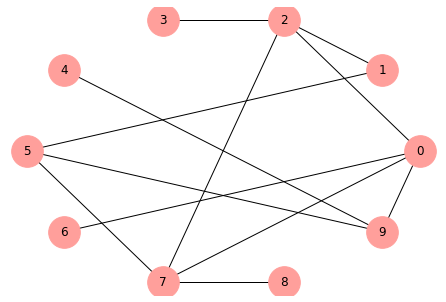

In [16]:
# Copied code from Think Complexity 2 notebook begin------------------------------------------

# Code for ER graph

def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-4')

In [18]:
# Checking connectivity
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

reachable_nodes(complete, 0)

reachable_nodes(random_graph, 0)

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

is_connected(complete)

random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

is_connected(random_graph)
# End copied code-------------------------------------------------------------------

False

**Exercise 2.1.d:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [28]:
# My solution
# For a graph to be connected, I imagine it must be fully bi-directionally connected 
# The time complexity of this annoys me. 
# It's basically linked list traversal--not that that's particularly efficient--without an actual linked list.

from itertools import combinations

def bi_connected(G):
    nodes = list(G.nodes)
    completed_edges = list(combinations(nodes, 2))
    actual_edges = list(G.edges)
    for edge in completed_edges:
        if edge in actual_edges:
            continue
        else:
            return False
    return True
    
bi_connected(G)

# Probably faster, but I don't know if it covers all cases, and only works with nx's implementation
def bi_connected2(G):
    nnodes = G.number_of_nodes()
    nedges = G.number_of_edges()
    expected_edges = nnodes*(nnodes-1)
    return nedges == expected_edges

bi_connected2(G)

False

In [29]:
# Copied code from Think Complexity 2 notebook begin------------------------------------------

# Probability of connectivity & ER graphs

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

In [33]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

pstar = np.log(n) / n
print(pstar)

ps = np.logspace(-1.3, 0, 11)
print(ps)

ys = [prob_connected(n, p, 1000) for p in ps]

0.23025850929940458
[0.05011872 0.0676083  0.09120108 0.12302688 0.16595869 0.22387211
 0.30199517 0.40738028 0.54954087 0.74131024 1.        ]


0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.004
0.12302687708123815 0.016
0.16595869074375605 0.109
0.22387211385683395 0.346
0.3019951720402016 0.664
0.40738027780411273 0.899
0.5495408738576245 0.989
0.7413102413009173 1.0
1.0 1.0
Saving figure to file figs/chap02-5


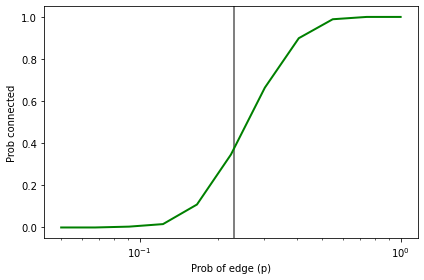

In [31]:
for p, y in zip(ps, ys):
    print(p, y)
    
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

savefig('figs/chap02-5')

300
100
30
Saving figure to file figs/chap02-6


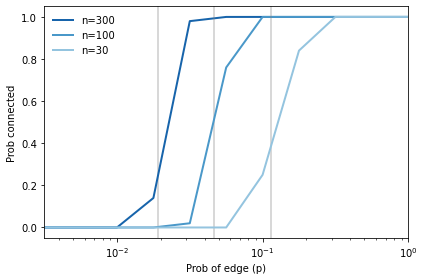

In [32]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')

savefig('figs/chap02-6')

# End copied code-------------------------------------------------------------------

**Exercise 2.2:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

**Ans:** Honestly, it's still $O(n+m)$ because adding 3 constant time steps does not change the situation much.  In fact, I'm pretty sure both functions would be considered to have $O(n)$ complexity because they're both still linear. 

**Exercise 2.3:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [40]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(set(G.neighbors(node)) - seen)
    return seen

It absolutely does not make the function run faster because looping through a few more times is faster than turning the neighbors into a set and finding the set difference. 

In [42]:
%timeit len(reachable_nodes(complete, 0))
%timeit len(reachable_nodes_precheck(complete, 0))

8.4 µs ± 73.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.46 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Exercise 2.4:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [43]:
def m_pairs(nodes, m):
    edges = list(combinations(nodes, 2))
    return random.sample(edges, m)

def make_m_graph(n,m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

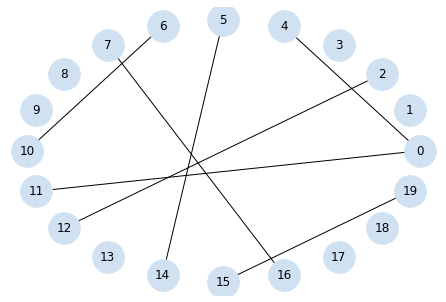

In [47]:
mgrf = make_m_graph(20,7)
nx.draw_circular(mgrf, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

In [48]:
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_m_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)



TypeError: can't multiply sequence by non-int of type 'numpy.float64'